Let's look at the depth in just the SCP

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [16]:
dbFile = '/Users/yoachim/gitRepos/sqlites/enigma_1189_sqlite.db'
opsimdb = utils.connectOpsimDb(dbFile)
propids, propTags = opsimdb.fetchPropInfo()
print propids
outDir='SCP'
resultsDb = db.ResultsDb(outDir=outDir)

{362: 'GalacticPlane', 363: 'SouthCelestialPole-18', 364: 'Universal-18-0824B', 365: 'NorthEclipticSpur-18c', 366: 'DDcosmology1'}


In [17]:
# looks like we want proposal 363
propid = 363
# Filter list, and map of colors (for plots) to filters.
filters = ['u','g','r','i','z','y']
colors={'u':'cyan','g':'g','r':'y','i':'r','z':'m', 'y':'k'}
filtorder = {'u':1,'g':2,'r':3,'i':4,'z':5,'y':6}

In [18]:
nside = 64
slicer = slicers.HealpixSlicer(nside=nside, lonCol='ditheredRA', latCol='ditheredDec')
metric = metrics.Coaddm5Metric()
bundleList = []
for fname in filters:
    sql = 'filter = "%s" and propid=%i' % (fname,propid)
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(bundleDict, opsimdb,
                                            outDir=outDir, resultsDb=resultsDb)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [19]:
group.runAll()

Querying database with constraint filter = "r" and propid=363
Found 8790 visits
Running:  ['opsim_CoaddM5_r_and_propid363_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "y" and propid=363
Found 8790 visits
Running:  ['opsim_CoaddM5_y_and_propid363_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "g" and propid=363
Found 8790 visits
Running:  ['opsim_CoaddM5_g_and_propid363_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "u" and propid=363
Found 8790 visits
Running:  ['opsim_CoaddM5_u_and_propid363_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "i" and propid=363
Found 8790 visits
Running:  ['opsim_CoaddM5_i_and_prop

Plotting figures with filter = "r" and propid=363 sqlconstraint now.
monopole: 22.2552  dipole: lon: 137.485, lat: -87.9211, amp: 3.82109
Plotting complete.
Plotting figures with filter = "y" and propid=363 sqlconstraint now.
monopole: 20.4171  dipole: lon: 80.2111, lat: -86.8334, amp: 2.9266
Plotting complete.
Plotting figures with filter = "g" and propid=363 sqlconstraint now.
monopole: 22.3718  dipole: lon: 138.581, lat: -86.6144, amp: 4.09811
Plotting complete.
Plotting figures with filter = "u" and propid=363 sqlconstraint now.
monopole: 24.6084  dipole: lon: -152.659, lat: -67.5949, amp: 0.740377
Plotting complete.
Plotting figures with filter = "i" and propid=363 sqlconstraint now.
monopole: 23.629  dipole: lon: -101.529, lat: -86.4819, amp: 1.76483
Plotting complete.
Plotting figures with filter = "z" and propid=363 sqlconstraint now.
monopole: 22.8715  dipole: lon: 70.0321, lat: -83.9016, amp: 1.85621
Plotting complete.


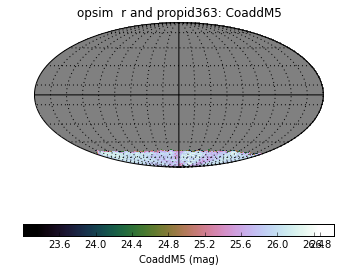

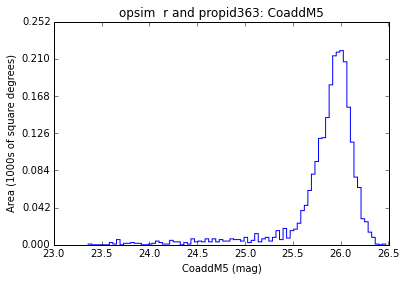

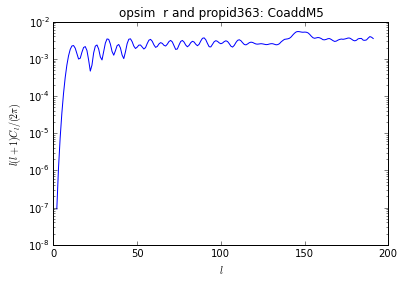

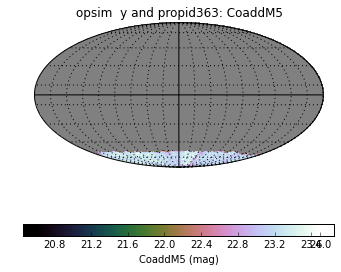

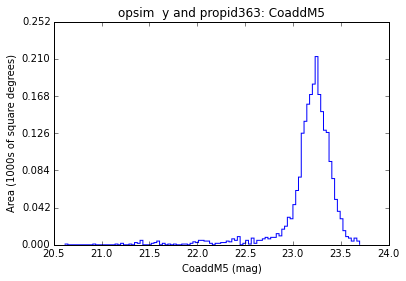

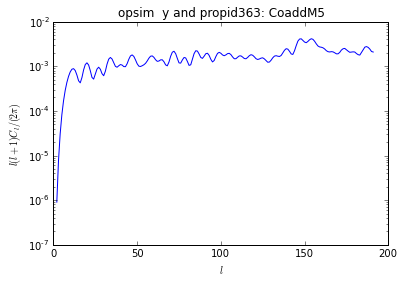

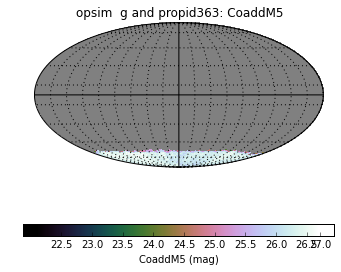

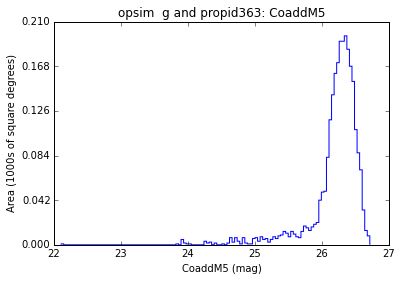

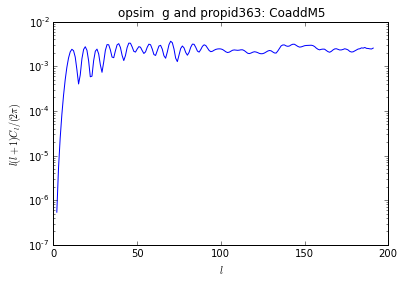

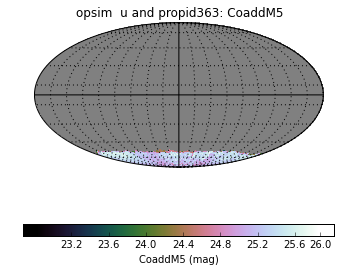

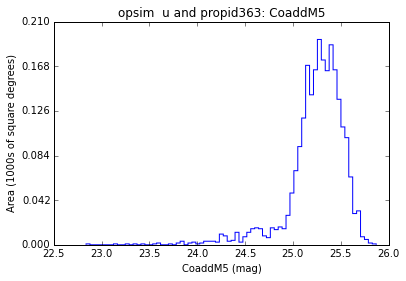

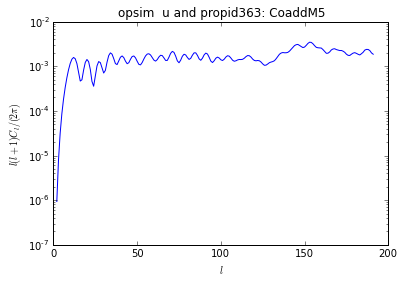

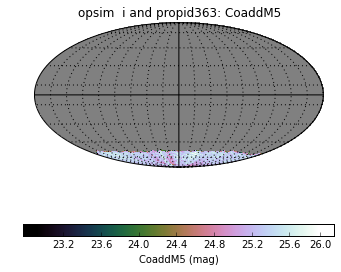

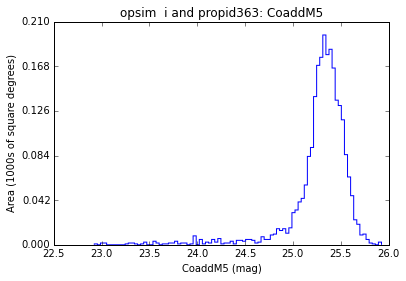

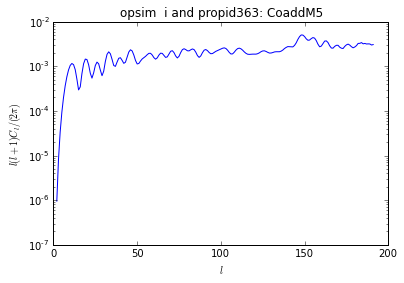

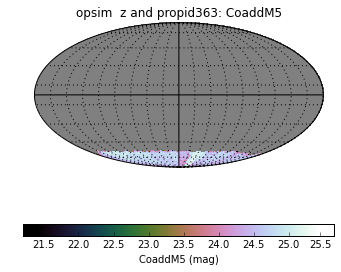

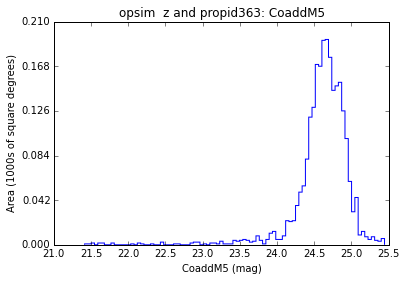

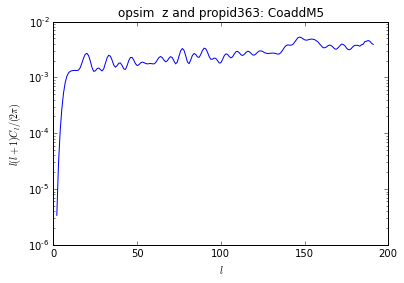

In [24]:
group.plotAll(closefigs=False)

In [23]:
help(group.plotAll)

Help on method plotAll in module lsst.sims.maf.metricBundles.metricBundleGroup:

plotAll(self, savefig=True, outfileSuffix=None, figformat='pdf', dpi=600, thumbnail=True, closefigs=True) method of lsst.sims.maf.metricBundles.metricBundleGroup.MetricBundleGroup instance
    Generate all the plots for all the metricBundles in bundleDict.
    This assumes 'clearMemory' was false.

